## Data Exploration

In [434]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [435]:
df = pd.read_csv('train.csv')

In [436]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [312]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

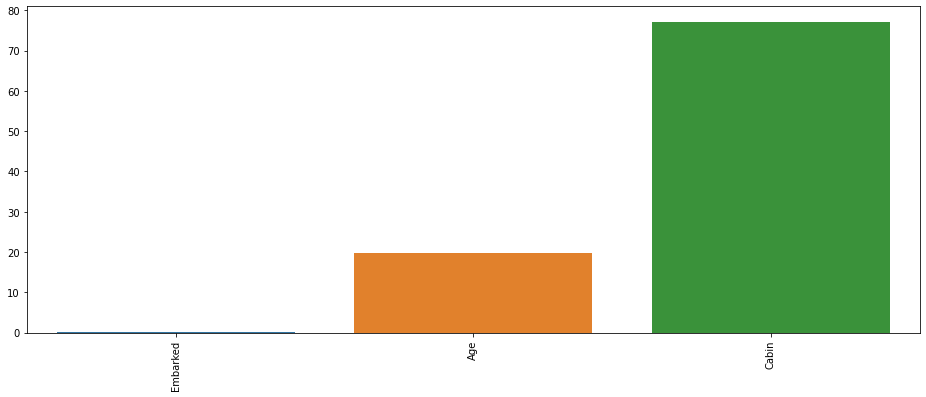

In [437]:
missing = percent_missing(df)
plt.figure(figsize = (16,6))
sns.barplot(x = missing.index, y = missing)
plt.xticks(rotation = 90);

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [315]:
df['Fare'] = df['Fare'].apply(float)

In [316]:
df.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

### Cabin

In [317]:
df[df['Cabin'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [318]:
df['Cabin'].nunique()

147

In [319]:
cabins = list(df[df['Cabin'].notnull()]['Cabin'])

In [320]:
cabins.sort()

In [365]:
df['Cabin Class']= df['Cabin'].apply(lambda x:x[0])

In [368]:
df['Cabin Class'].value_counts()

n    687
C     59
B     45
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin Class, dtype: int64

In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 766
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Sex             889 non-null    object 
 4   Age             889 non-null    float64
 5   SibSp           889 non-null    int64  
 6   Parch           889 non-null    int64  
 7   Ticket          889 non-null    object 
 8   Fare            889 non-null    float64
 9   Cabin           889 non-null    object 
 10  Embarked        889 non-null    object 
 11  Family Members  889 non-null    int64  
 12  Second Name     889 non-null    object 
 13  Cabin Class     889 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


### Ticket

In [324]:
df['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
347088               6
3101295              6
                    ..
349910               1
349249               1
2628                 1
STON/O 2. 3101292    1
SC/PARIS 2149        1
Name: Ticket, Length: 681, dtype: int64

In [325]:
df[df['Ticket']== '1601']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,none,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,none,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,none,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,none,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,none,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,none,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,none,S


In [326]:
df[df['Ticket']== 'CA. 2343']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,none,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,none,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,none,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,none,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,none,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,none,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,none,S


In [327]:
df[df['Ticket']== '347082']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,none,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,none,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,none,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,none,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,none,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,none,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,none,S


In [328]:
df[df['Ticket']== '347088']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,none,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,none,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,none,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,none,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,none,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,none,S


In [329]:
df[df['Ticket']== '3101295']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,none,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,none,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,none,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,none,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,none,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,none,S


In [330]:
df['First Name'] = df['Name'].apply(lambda x: x.split(',')[0])

In [331]:
df[df['Ticket']== '2628']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.225,none,C,Youseff


In [375]:
df['Ticket'].value_counts()

1601                 7
CA. 2343             7
347082               7
347088               6
CA 2144              6
                    ..
STON/O 2. 3101292    1
347068               1
PC 17609             1
3474                 1
SC/PARIS 2149        1
Name: Ticket, Length: 680, dtype: int64

In [332]:
df["First Name"].value_counts()

Andersson    9
Sage         7
Goodwin      6
Skoog        6
Johnson      6
            ..
Goncalves    1
Elsbury      1
Youseff      1
Bystrom      1
Coxon        1
Name: First Name, Length: 667, dtype: int64

In [333]:
df[df["First Name"] == 'Sage']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,none,S,Sage
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,none,S,Sage
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,none,S,Sage
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,none,S,Sage
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,none,S,Sage
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,none,S,Sage
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,none,S,Sage


In [334]:
df['Family Members'] = df['SibSp']+df['Parch']

In [335]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,none,S,Braund,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,none,S,Heikkinen,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,none,S,Allen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,none,S,Montvila,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,none,S,Johnston,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,0


### Embarked

In [336]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,0


<AxesSubplot:xlabel='Embarked', ylabel='count'>

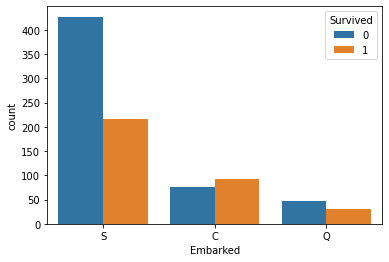

In [337]:
sns.countplot(x = 'Embarked', data = df, hue = 'Survived')

In [338]:
# df[df['Cabin']== 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Icard,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Stone,0


In [339]:
df = df.drop([61,829], axis = 0)

In [340]:
df = df.drop('Cabin', axis = 1)

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             712 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           889 non-null    object 
 11  Embarked        889 non-null    object 
 12  First Name      889 non-null    object 
 13  Family Members  889 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


### Age

In [370]:
# df.sort_values()

In [343]:
df[df['Age'].isnull()].sort_values('Family Members').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,none,S,Sage,10
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,none,S,Sage,10


In [344]:
# df['Cabin_class']

In [345]:
df['Second Name'] = df['Name'].apply(lambda x : (x.split('.')[0]).split(',')[1].strip())

In [346]:
df[df['Age'].isnull()].sort_values('Family Members').tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members,Second Name
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,none,S,Sage,10,Miss
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,none,S,Sage,10,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,none,S,Sage,10,Miss


In [347]:
df['Second Name'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Sir               1
Mme               1
Ms                1
Don               1
Lady              1
Jonkheer          1
the Countess      1
Name: Second Name, dtype: int64

In [348]:
df[df['Second Name'] == 'Master']['Age'].mean()

4.574166666666667

In [349]:
names = set(df['Second Name'])

In [350]:
df['Second Name'].value_counts()

Mr              517
Miss            181
Mrs             124
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Capt              1
Sir               1
Mme               1
Ms                1
Don               1
Lady              1
Jonkheer          1
the Countess      1
Name: Second Name, dtype: int64

In [372]:
# df[(df['Second Name'] == 'Master')].fillna(df[df['Second Name'] == 'Master']['Age'].mean())

In [352]:
df[df['Second Name'] == 'Mr']['Age'].mean()

32.368090452261306

In [353]:
age_nonnull = df[df['Age'].notnull()]

In [354]:
for name in names:
    nulls = df[(df['Second Name'] == name)].fillna(df[df['Second Name'] == name]['Age'].mean())
    age_nonnull = pd.concat([age_nonnull, nulls], axis =0)

In [355]:
df = age_nonnull.drop_duplicates()

In [356]:
final_df = df.sort_index()

In [357]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Family Members,Second Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,none,S,Braund,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,none,S,Heikkinen,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S,Futrelle,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,none,S,Allen,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,32.36809,8,2,CA. 2343,69.5500,none,S,Sage,10,Mr
859,860,0,3,"Razi, Mr. Raihed",male,32.36809,0,0,2629,7.2292,none,C,Razi,0,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,32.36809,0,0,345777,9.5000,none,S,van Melkebeke,0,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,32.36809,0,0,349217,7.8958,none,S,Laleff,0,Mr


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 766
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Name            889 non-null    object 
 4   Sex             889 non-null    object 
 5   Age             889 non-null    float64
 6   SibSp           889 non-null    int64  
 7   Parch           889 non-null    int64  
 8   Ticket          889 non-null    object 
 9   Fare            889 non-null    float64
 10  Cabin           889 non-null    object 
 11  Embarked        889 non-null    object 
 12  First Name      889 non-null    object 
 13  Family Members  889 non-null    int64  
 14  Second Name     889 non-null    object 
dtypes: float64(2), int64(6), object(7)
memory usage: 111.1+ KB


In [359]:
df = df.drop('Name', axis = 1)

### Names

In [360]:
df['First Name'].nunique()

665

In [361]:
df = df.drop('First Name', axis = 1)

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 766
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Sex             889 non-null    object 
 4   Age             889 non-null    float64
 5   SibSp           889 non-null    int64  
 6   Parch           889 non-null    int64  
 7   Ticket          889 non-null    object 
 8   Fare            889 non-null    float64
 9   Cabin           889 non-null    object 
 10  Embarked        889 non-null    object 
 11  Family Members  889 non-null    int64  
 12  Second Name     889 non-null    object 
 13  Cabin Class     889 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 104.2+ KB


In [363]:
df['Second Name'].nunique()

17

In [364]:
df['Ticket'].nunique()

680

In [376]:
df = df.drop('Ticket', axis = 1)

In [377]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 766
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     889 non-null    int64  
 1   Survived        889 non-null    int64  
 2   Pclass          889 non-null    int64  
 3   Sex             889 non-null    object 
 4   Age             889 non-null    float64
 5   SibSp           889 non-null    int64  
 6   Parch           889 non-null    int64  
 7   Fare            889 non-null    float64
 8   Cabin           889 non-null    object 
 9   Embarked        889 non-null    object 
 10  Family Members  889 non-null    int64  
 11  Second Name     889 non-null    object 
 12  Cabin Class     889 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 97.2+ KB


### Setting data

In [386]:
X_str = df[['Sex', 'Second Name', 'Cabin Class', 'Embarked', 'Cabin']]

In [387]:
X_int = df.drop(['Sex', 'Second Name', 'Cabin Class', 'Embarked', 'Cabin'], axis = 1)

In [388]:
X_str_dummies = pd.get_dummies(data = X_str, drop_first=True)

In [389]:
X_str_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 766
Columns: 173 entries, Sex_male to Cabin_none
dtypes: uint8(173)
memory usage: 157.1 KB


In [390]:
X_str_dummies

,Sex_male,Second Name_Col,Second Name_Don,Second Name_Dr,Second Name_Jonkheer,Second Name_Lady,Second Name_Major,Second Name_Master,Second Name_Miss,Second Name_Mlle,...,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_none
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
859,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
868,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
878,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [391]:
df_combined = pd.concat([X_str_dummies,X_int], axis = 1)

In [392]:
df_combined

,Sex_male,Second Name_Col,Second Name_Don,Second Name_Dr,Second Name_Jonkheer,Second Name_Lady,Second Name_Major,Second Name_Master,Second Name_Miss,Second Name_Mlle,...,Cabin_T,Cabin_none,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family Members
0,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,3,22.00000,1,0,7.2500,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,38.00000,1,0,71.2833,1
2,0,0,0,0,0,0,0,0,1,0,...,0,1,3,1,3,26.00000,0,0,7.9250,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,4,1,1,35.00000,1,0,53.1000,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,5,0,3,35.00000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,1,0,0,0,0,0,0,0,0,0,...,0,1,847,0,3,32.36809,8,2,69.5500,10
859,1,0,0,0,0,0,0,0,0,0,...,0,1,860,0,3,32.36809,0,0,7.2292,0
868,1,0,0,0,0,0,0,0,0,0,...,0,1,869,0,3,32.36809,0,0,9.5000,0
878,1,0,0,0,0,0,0,0,0,0,...,0,1,879,0,3,32.36809,0,0,7.8958,0


In [396]:
X = df_combined.drop('Survived', axis = 1)

In [397]:
y = df_combined['Survived']

In [395]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [418]:
scaler = StandardScaler()

In [419]:
X_train = scaler.fit_transform(X_train)

In [420]:
X_test = scaler.transform(X_test)

In [421]:
from sklearn.linear_model import LogisticRegressionCV

In [422]:
model = LogisticRegressionCV(max_iter = 5000)

In [423]:
model.fit(X_train, y_train)

LogisticRegressionCV(max_iter=5000)

In [431]:
pred = model.predict(X_train)

In [425]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [432]:
accuracy_score(y_train, pred)

0.882636655948553

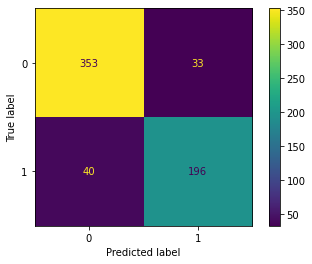

In [429]:
plot_confusion_matrix(model, X_train, y_train)

In [433]:
print(classification_report(y_train, pred))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       386
           1       0.86      0.83      0.84       236

    accuracy                           0.88       622
   macro avg       0.88      0.87      0.87       622
weighted avg       0.88      0.88      0.88       622

